In [2]:
import networkx as nx
import pandas as pd
import numpy as np

In [3]:
#Creating dummy data for our dataframe
index = list(range(10,48))
data = np.random.randint(0,100,size=(38, 38))
columns = index

In [37]:
#Creating dummy dataframe
df = pd.DataFrame(data, columns, index)
df.head()

,10,11,12,13,14,15,16,17,18,19,...,38,39,40,41,42,43,44,45,46,47
10,85,33,64,86,68,70,41,88,2,48,...,30,13,85,5,96,64,72,86,39,44
11,1,63,24,3,44,97,10,76,49,67,...,48,18,37,20,10,87,87,96,14,29
12,44,85,69,45,96,59,0,29,14,40,...,95,74,67,64,44,74,78,36,76,67
13,54,19,90,41,18,65,46,62,62,77,...,73,30,43,20,94,97,4,75,48,38
14,32,83,65,7,48,21,28,34,7,83,...,44,86,96,99,87,47,65,35,73,15


In [46]:
#Create graph and add nodes
G = nx.MultiDiGraph()
G.clear()
for node in list(df.index):
    G.add_node(node)
G.nodes()
        

NodeView((10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47))

In [49]:
#Add edges with weights
for node_1 in list(df.index):
    for node_2 in list(df.index):
        G.add_edge(node_1, node_2, weight=df.iat[node_1 -10, node_2 - 10])

#Check that weights have been added correctly by testing a subset        
for (u, v, wt) in G.edges.data('weight'):
    if int(wt) < 20:
        print(f"({u}, {v}, {wt})")

(10, 18, 2)
(10, 18, 2)
(10, 18, 2)
(10, 20, 19)
(10, 20, 19)
(10, 20, 19)
(10, 23, 4)
(10, 23, 4)
(10, 23, 4)
(10, 24, 5)
(10, 24, 5)
(10, 24, 5)
(10, 29, 16)
(10, 29, 16)
(10, 29, 16)
(10, 33, 18)
(10, 33, 18)
(10, 33, 18)
(10, 39, 13)
(10, 39, 13)
(10, 39, 13)
(10, 41, 5)
(10, 41, 5)
(10, 41, 5)
(11, 10, 1)
(11, 10, 1)
(11, 10, 1)
(11, 13, 3)
(11, 13, 3)
(11, 13, 3)
(11, 16, 10)
(11, 16, 10)
(11, 16, 10)
(11, 30, 11)
(11, 30, 11)
(11, 30, 11)
(11, 33, 6)
(11, 33, 6)
(11, 33, 6)
(11, 39, 18)
(11, 39, 18)
(11, 39, 18)
(11, 42, 10)
(11, 42, 10)
(11, 42, 10)
(11, 46, 14)
(11, 46, 14)
(11, 46, 14)
(12, 16, 0)
(12, 16, 0)
(12, 16, 0)
(12, 18, 14)
(12, 18, 14)
(12, 18, 14)
(12, 23, 5)
(12, 23, 5)
(12, 23, 5)
(12, 24, 4)
(12, 24, 4)
(12, 24, 4)
(12, 28, 14)
(12, 28, 14)
(12, 28, 14)
(12, 29, 4)
(12, 29, 4)
(12, 29, 4)
(12, 36, 16)
(12, 36, 16)
(12, 36, 16)
(13, 11, 19)
(13, 11, 19)
(13, 11, 19)
(13, 14, 18)
(13, 14, 18)
(13, 14, 18)
(13, 24, 18)
(13, 24, 18)
(13, 24, 18)
(13, 26, 16)
(13, 2

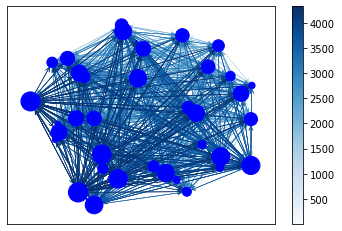

In [50]:
#Visualize the graph
import matplotlib.pyplot as plt
import matplotlib as mpl

pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="blue")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=plt.cm.Blues,
    width=0.5,
)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)